## Introduction

This kernel shows the data visualization of 'world food products' dataset. For the sake of simplicity, as this dataset can be used to answer many different questions, I have only considers nutrition features for the products. In this kernel five different visualization techniques are used which will help you understand the data in more better way.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn
from pandas.tools.plotting import scatter_matrix

# DataSet 

In [2]:
data_set = pd.read_csv('en.openfoodfacts.org.products.csv', delimiter='	', low_memory=False)
data_set.shape

(137482, 161)

Extra Function Definitions

In [3]:
def no_null_objects(data, columns=None):
    if columns is None:
        columns = data.columns
    return data[np.logical_not(np.any(data[columns].isnull().values, axis=1))]

This is a real time dataset which having 137482 data instaces and each instance contains 161 features to describe it. Let see how much Nan proportion this dataset has with respect to each feature.

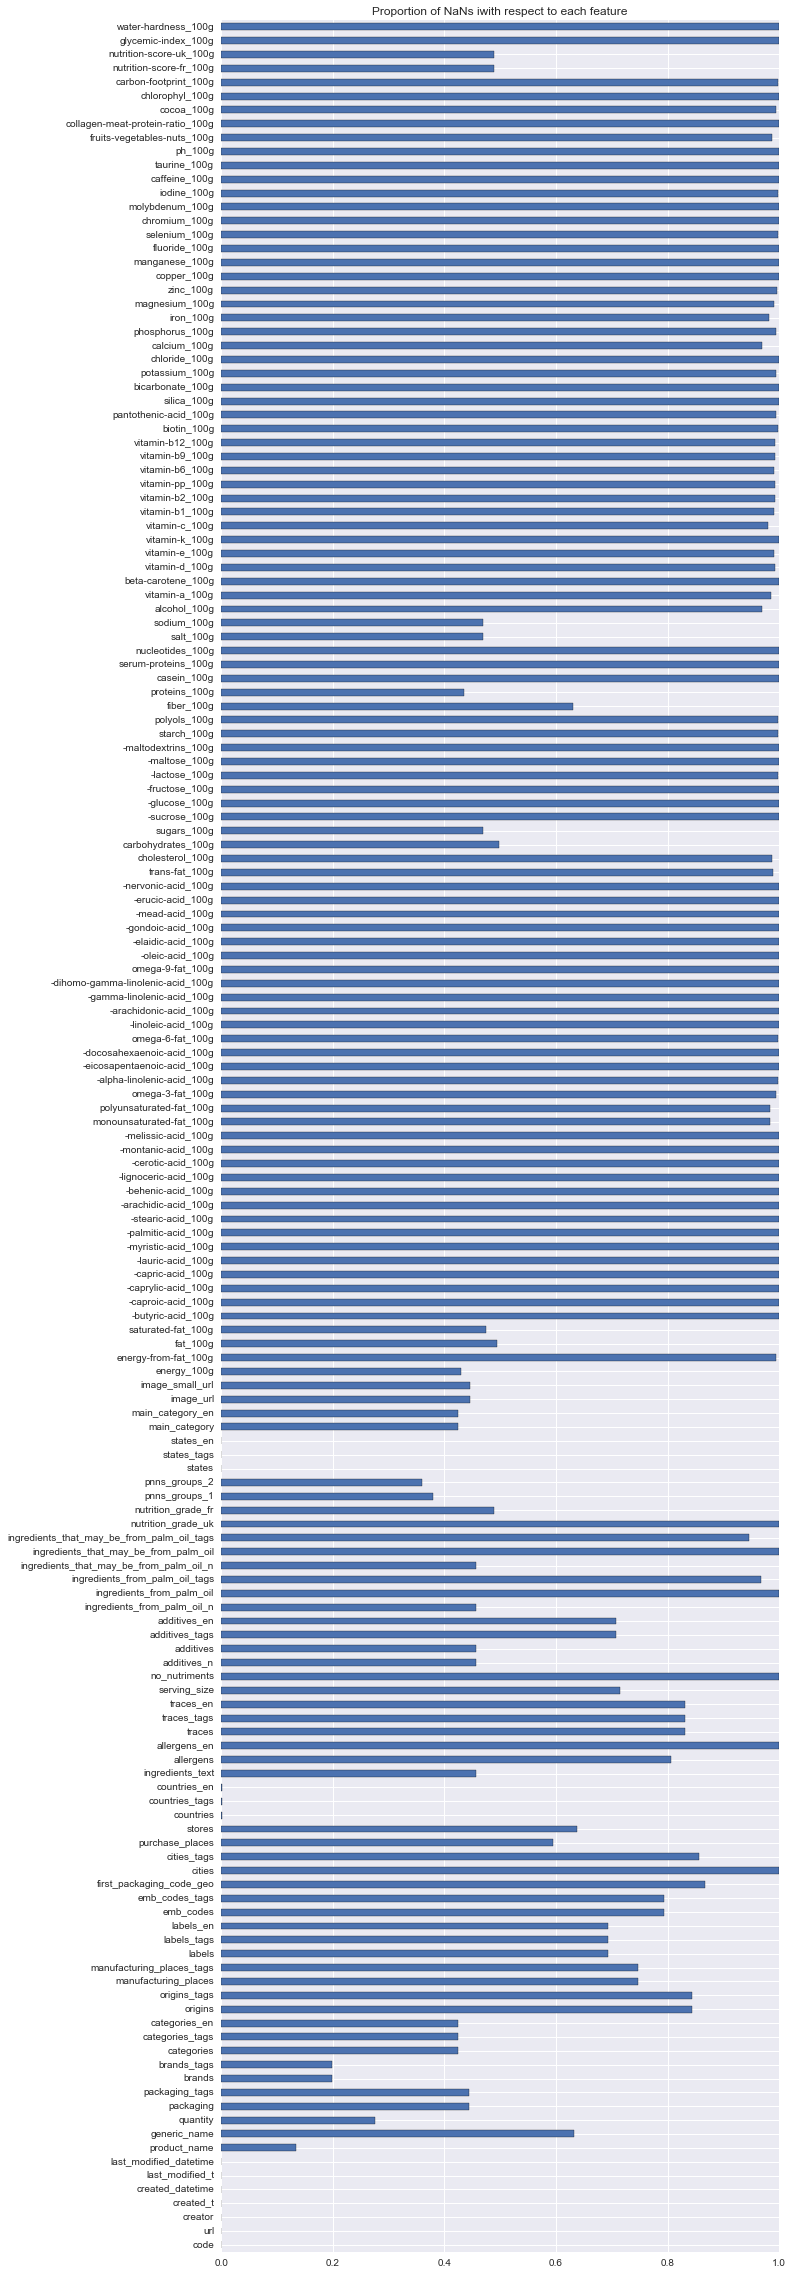

In [4]:
plt.figure(figsize=(10, 40))
nutrition_features_means = data_set.isnull().mean(axis=0)
nutrition_features_means.plot.barh()
plt.title("Proportion of NaNs iwith respect to each feature")
plt.show()

This clearly shows that dataset is highly sparse. Considering the part of the dataset which shows the proportion of nutitions in a product (i.e. column 63 to 179).Their means are,

In [5]:
print('\nWeighted Average mean of each neutrition feature in dataset')
print(nutrition_features_means[63:].mean())


Weighted Average mean of each neutrition feature in dataset
0.9389688564796161


Now let see its histogram for these features to get a better understanding. I am using 10 bins 

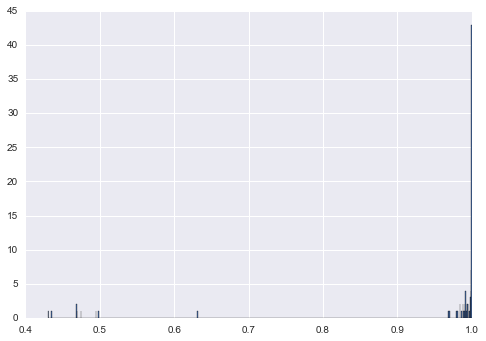

In [6]:
plt.hist(nutrition_features_means[63:-4],bins=1000)
plt.show()

The above provided graph indicates that most of the nutritions are either rearly used or due to some reason they werent collected, ruling out the second reason we can conclude that there are some nutritions which are mostly used in products. Let see what these nutritions are

In [7]:
nutrition_features_means[63:-4][nutrition_features_means<.95]

energy_100g           0.430355
fat_100g              0.494654
saturated-fat_100g    0.474258
carbohydrates_100g    0.498218
sugars_100g           0.468563
fiber_100g            0.630890
proteins_100g         0.435170
salt_100g             0.468890
sodium_100g           0.469240
dtype: float64

From Total of 116 nutrition features which are describe the product, must be important factor to buy it, seven 
nutritions are found in most products and remianing 109 nutritions contains probability less than 5%. Now lets see the difference in vegetarian and non vegeterain products

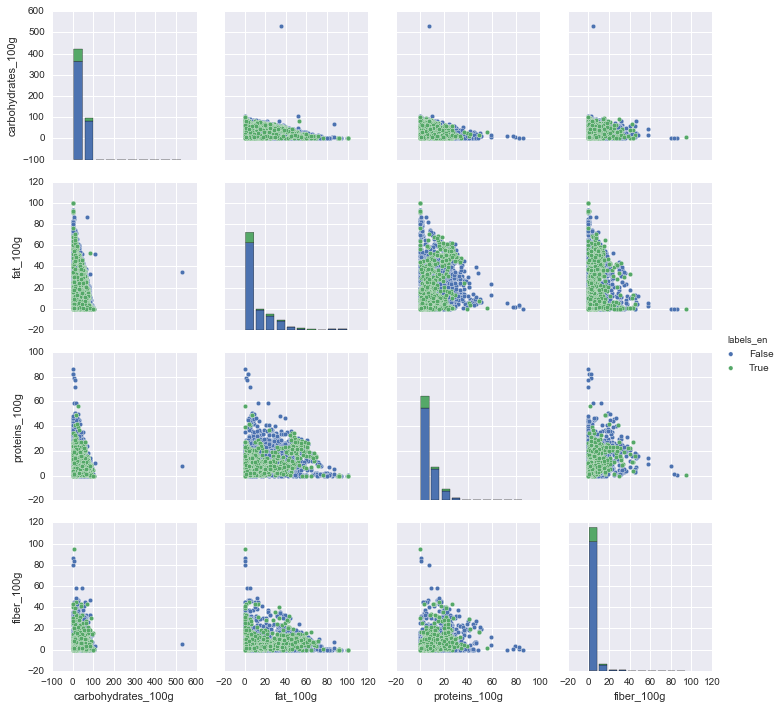

In [8]:
nutritions_data = no_null_objects(data_set[["carbohydrates_100g", "fat_100g", "proteins_100g","fiber_100g", "labels_en"]])
nutritions_data["labels_en"] = nutritions_data["labels_en"].str.contains("Vegan")
plt.figure(figsize=(20, 20))
nutritions_data["carbohydrates_100g"] = nutritions_data["carbohydrates_100g"]
seaborn.pairplot(nutritions_data, hue="labels_en", vars=["carbohydrates_100g", "fat_100g", "proteins_100g", "fiber_100g"])

This indicates that most of the products for vegan and non-vegan shows make the same distribution more or less in a mantain factor but there are some products which are outliers shows that they are non vegan.

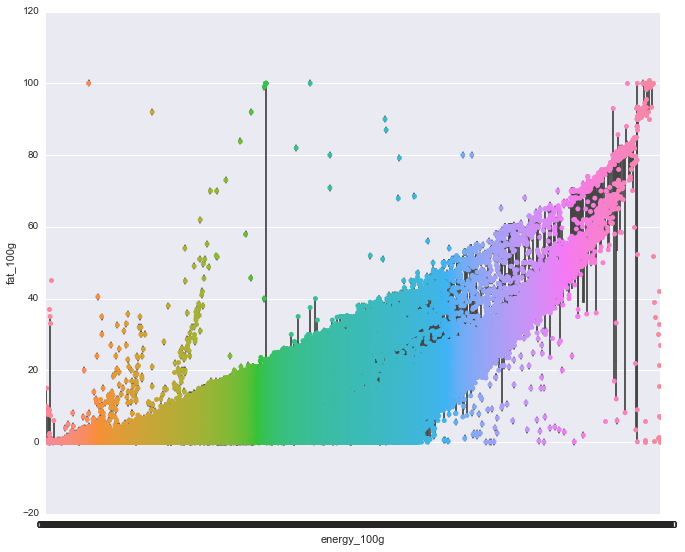

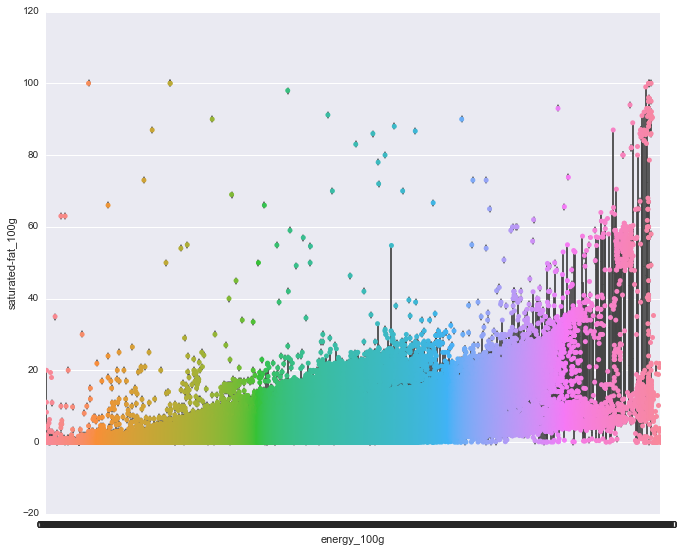

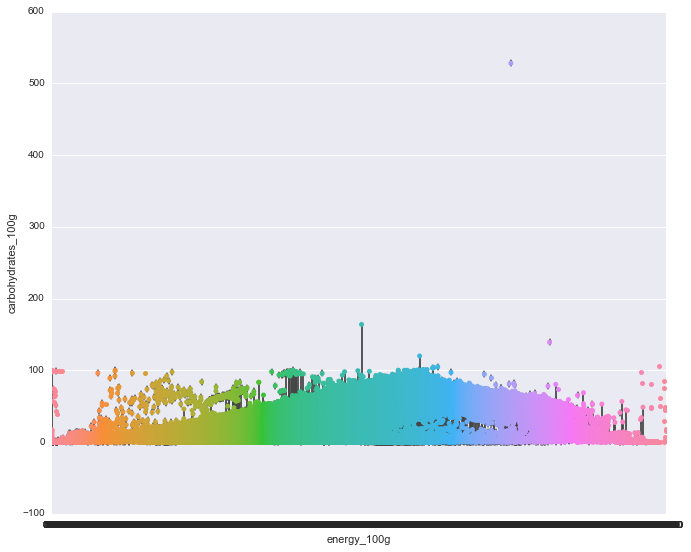

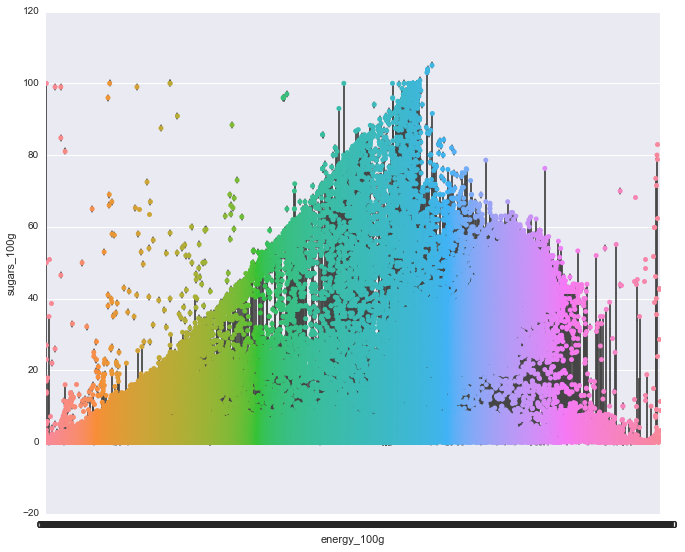

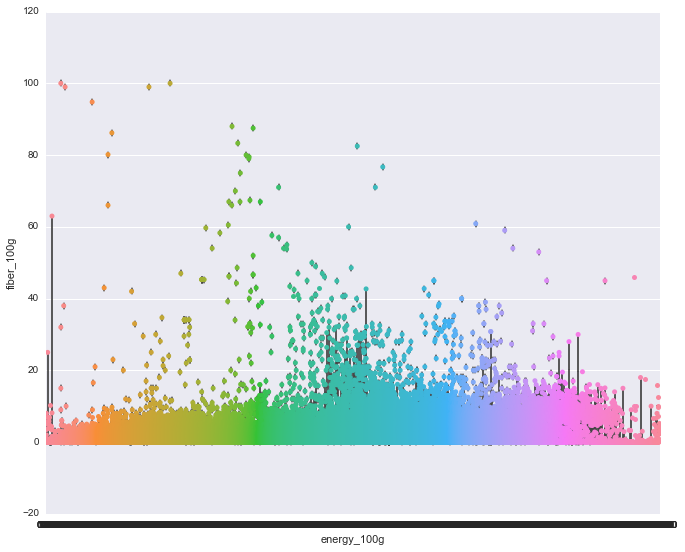

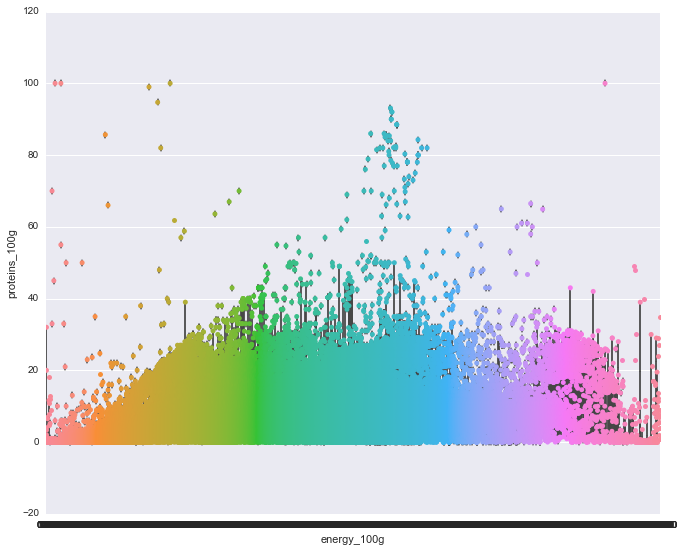

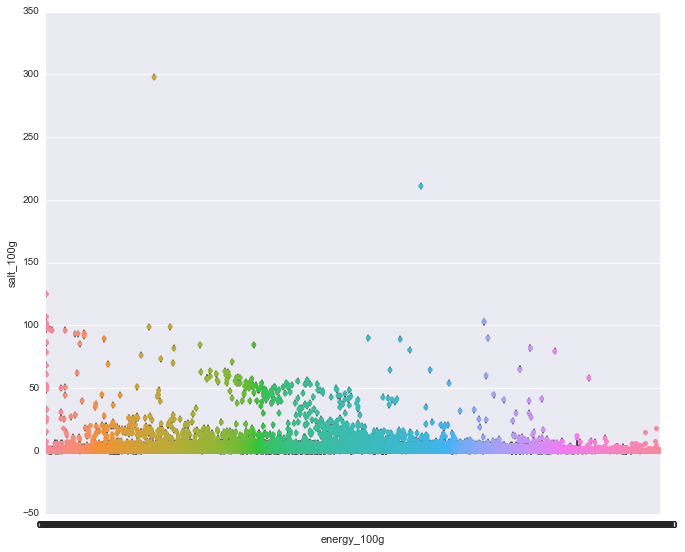

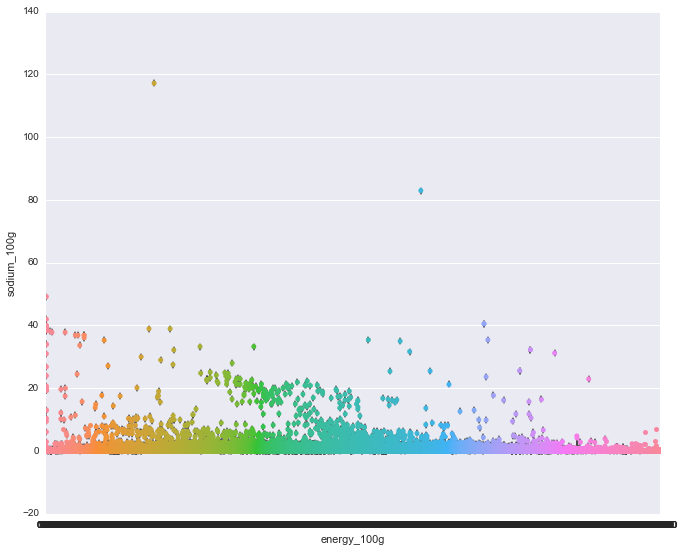

In [9]:
plt.subplots(figsize=(11, 9))
ax=seaborn.boxplot(x="energy_100g",y="fat_100g",data=data_set)
ax=seaborn.stripplot(x="energy_100g",y="fat_100g",data=data_set,jitter=True)

plt.subplots(figsize=(11, 9))
ax=seaborn.boxplot(x="energy_100g",y="saturated-fat_100g",data=data_set)
ax=seaborn.stripplot(x="energy_100g",y="saturated-fat_100g",data=data_set,jitter=True)

plt.subplots(figsize=(11, 9))
ax=seaborn.boxplot(x="energy_100g",y="carbohydrates_100g",data=data_set)
ax=seaborn.stripplot(x="energy_100g",y="carbohydrates_100g",data=data_set,jitter=True)

plt.subplots(figsize=(11, 9))
ax=seaborn.boxplot(x="energy_100g",y="sugars_100g",data=data_set)
ax=seaborn.stripplot(x="energy_100g",y="sugars_100g",data=data_set,jitter=True)

plt.subplots(figsize=(11, 9))
ax=seaborn.boxplot(x="energy_100g",y="fiber_100g",data=data_set)
ax=seaborn.stripplot(x="energy_100g",y="fiber_100g",data=data_set,jitter=True)

plt.subplots(figsize=(11, 9))
ax=seaborn.boxplot(x="energy_100g",y="proteins_100g",data=data_set)
ax=seaborn.stripplot(x="energy_100g",y="proteins_100g",data=data_set,jitter=True)

plt.subplots(figsize=(11, 9))
ax=seaborn.boxplot(x="energy_100g",y="salt_100g",data=data_set)
ax=seaborn.stripplot(x="energy_100g",y="salt_100g",data=data_set,jitter=True)

plt.subplots(figsize=(11, 9))
ax=seaborn.boxplot(x="energy_100g",y="sodium_100g",data=data_set)
ax=seaborn.stripplot(x="energy_100g",y="sodium_100g",data=data_set,jitter=True)

This shows a distribution of Energy with all the big names came out after the histogram (i.e. fat_100g saturated-fat_100g carbohydrates_100g sugars_100g fiber_100g proteins_100g salt_100g sodium_100g),who are one of the main nutritionss in our products. Here strip plot is use to display all observation with their under line distribution.

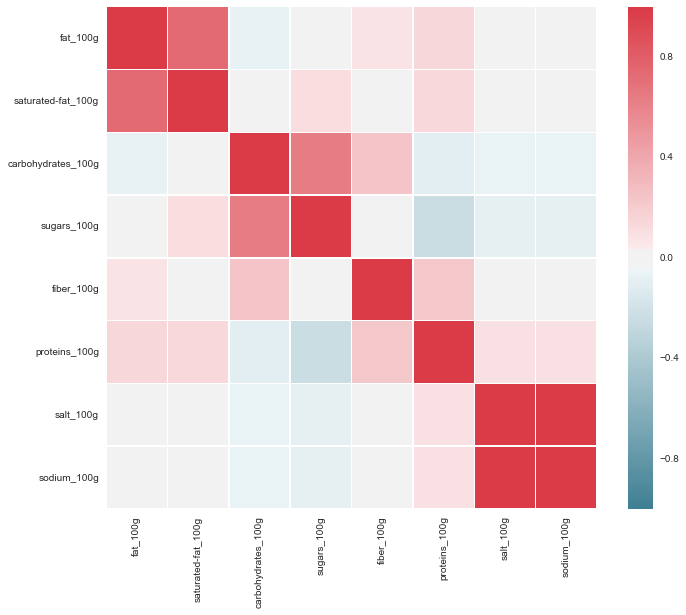

In [10]:
data_corr = data_set[["fat_100g","saturated-fat_100g","carbohydrates_100g","sugars_100g","fiber_100g","proteins_100g","salt_100g","sodium_100g"]] 
corr = data_corr.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
seaborn.heatmap(corr,  cmap=cmap, linewidths=.5, ax=ax)

The above figure show the correlation of mostly found nutritions with each other, this kind of the visualization is called
heatmap.